# Analisi esercizio 5.1

In [194]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams.update({'font.size': 17})

In [195]:
sum_prog= np.loadtxt("Esercizio5_1/Final/result_100_unif.txt")
sum_prog2= np.loadtxt("Esercizio5_1/Final/result_100_gauss.txt")
sum_prog3= np.loadtxt("Esercizio5_1/Final/result_210_unif.txt")
sum_prog4= np.loadtxt("Esercizio5_1/Final/result_210_gauss.txt")
equilibration_100=np.loadtxt("Esercizio5_1/Final/Equilibration_100.dat")
equilibration_210=np.loadtxt("Esercizio5_1/Final/Equilibration_210.dat")

In questo esercizio ho cercato di calcolare il raggio medio degli orbitali $1s$ e $2p$ di un atomo idrogenoide.

Per fare ciò ho dovuto campionare le distribuzioni $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ utilizzando l'algoritmo di metropolis. Ho utilizzato due distribuzioni di appoggio diverse, una distribuzione uniforme ed una distribuzione gaussiana. L'algoritmo di Metropolis richiede una probabilità di accettare la mossa pari al 50%, perciò ho cercato di ottimizzare l'algoritmo cercando il passo migliore. Per la distribuzione uniforme il passo migliore è $\delta=6.2$, mentre per la gaussiana è $\delta=2.5$.

### Equilibrizazione

La prima cosa che ho fatto è stata equilibrare il sistema. Per fare ciò ho utilizzato 1000 passi dell'algoritmo di metropolis prendendo come punto di partenza l'origine. Dopo aver equilibrato il sistema ho cominciato con le misurazione del raggio. 

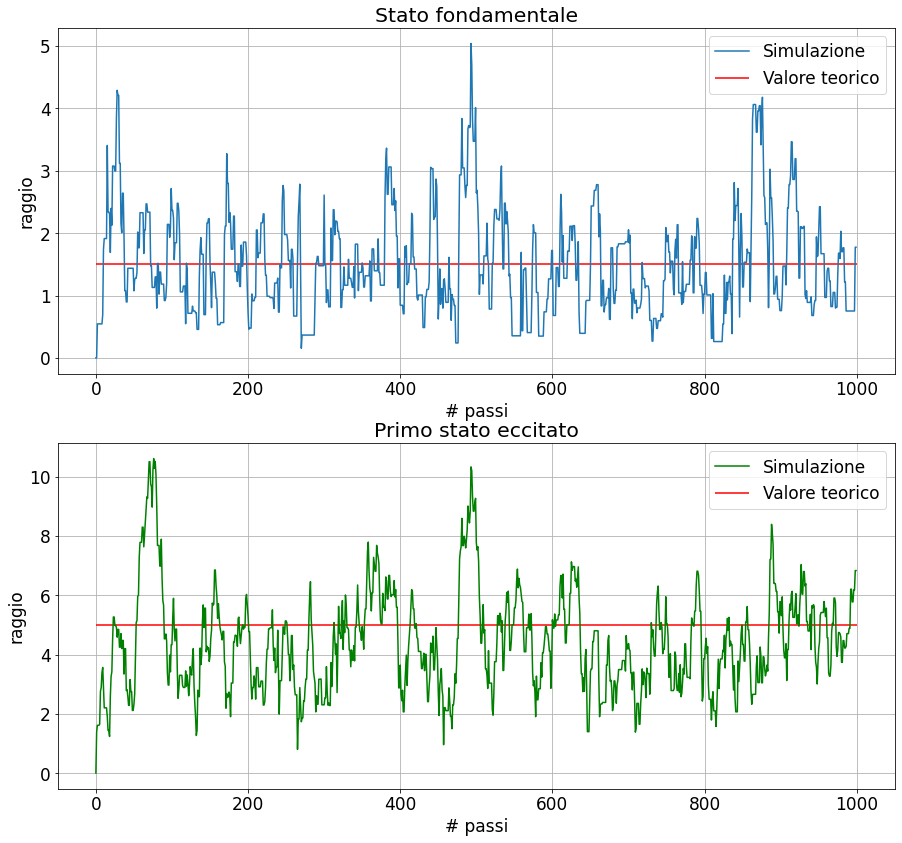

In [196]:
x=np.arange(len(equilibration_100))
fig, ax = plt.subplots(2,1, figsize=(15, 14))

ax[0].plot(x,equilibration_100,label="Simulazione")
ax[0].set_xlabel("# passi")
ax[0].hlines(1.5,0,len(x),color="red",label="Valore teorico")
ax[0].set_ylabel("raggio")
ax[0].grid(True)
ax[0].set_title("Stato fondamentale")
ax[0].legend()

ax[1].plot(x,equilibration_210, color='green',label="Simulazione")
ax[1].set_xlabel("# passi")
ax[1].hlines(5,0,len(x),color="red",label="Valore teorico")
ax[1].set_ylabel("raggio")
ax[1].grid(True)
ax[1].set_title("Primo stato eccitato")
ax[1].legend()

In questo grafico notiamo come il sistema sia equilibrato alla fine dei primi 1000 passi dell'algoritmo di metropolis.

### Test partendo da un punto molto lontano

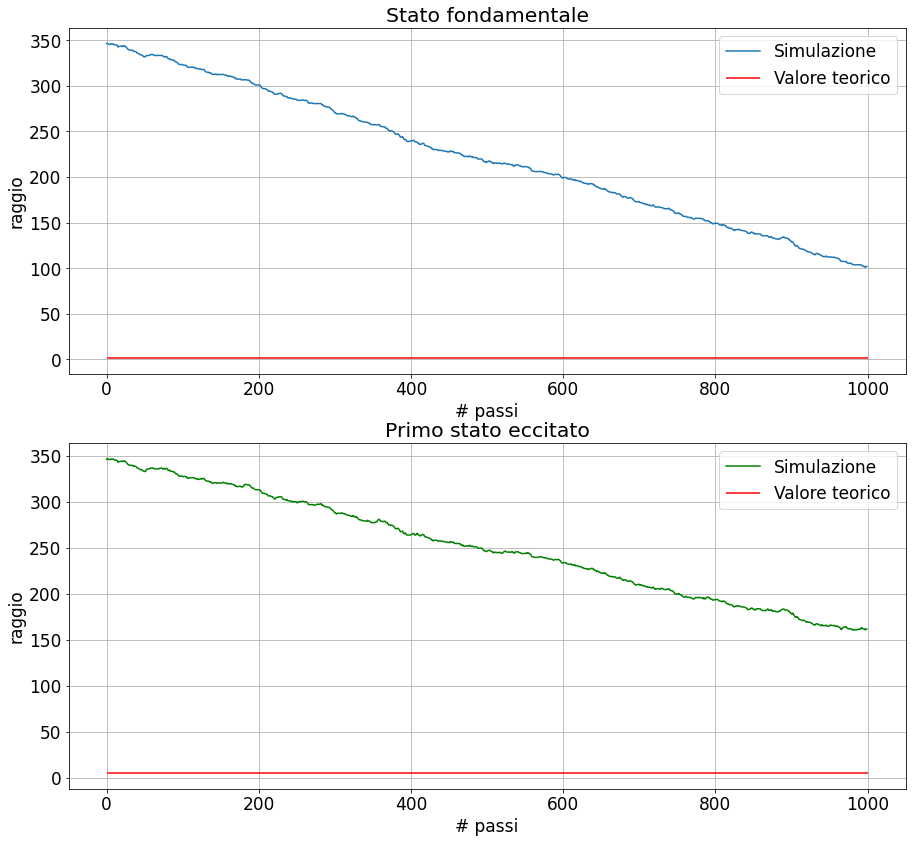

In [197]:
equilibration_100=np.loadtxt("Esercizio5_1/Test/Equilibration_100.dat")
equilibration_210=np.loadtxt("Esercizio5_1/Test/Equilibration_210.dat")

x=np.arange(len(equilibration_100))
fig, ax = plt.subplots(2,1, figsize=(15, 14))

ax[0].plot(x,equilibration_100,label="Simulazione")
ax[0].set_xlabel("# passi")
ax[0].hlines(1.5,0,len(x),color="red",label="Valore teorico")
ax[0].set_ylabel("raggio")
ax[0].grid(True)
ax[0].set_title("Stato fondamentale")
ax[0].legend()

ax[1].plot(x,equilibration_210, color='green',label="Simulazione")
ax[1].set_xlabel("# passi")
ax[1].hlines(5,0,len(x),color="red",label="Valore teorico")
ax[1].set_ylabel("raggio")
ax[1].grid(True)
ax[1].set_title("Primo stato eccitato")
ax[1].legend()


In questo grafico mostro l'equilibrizazione di un sistema che parte molto lontano dal punto di equilibrio, in questo caso il punto (-200,-200,-200). Si nota come per un punto molto lontano non bastano 1000 passi dell'algoritmo di metropolis, ma vedendo l'andamento della curva il sistema sta comunque andando verso l'equilibrio

Dopo aver equilibrato il sistema ho eseguito $M=10^6$ simulazioni ed ho utlizzato una media a blocchi con $N=100$ blocchi.

### Raggio dello stato fondamentale

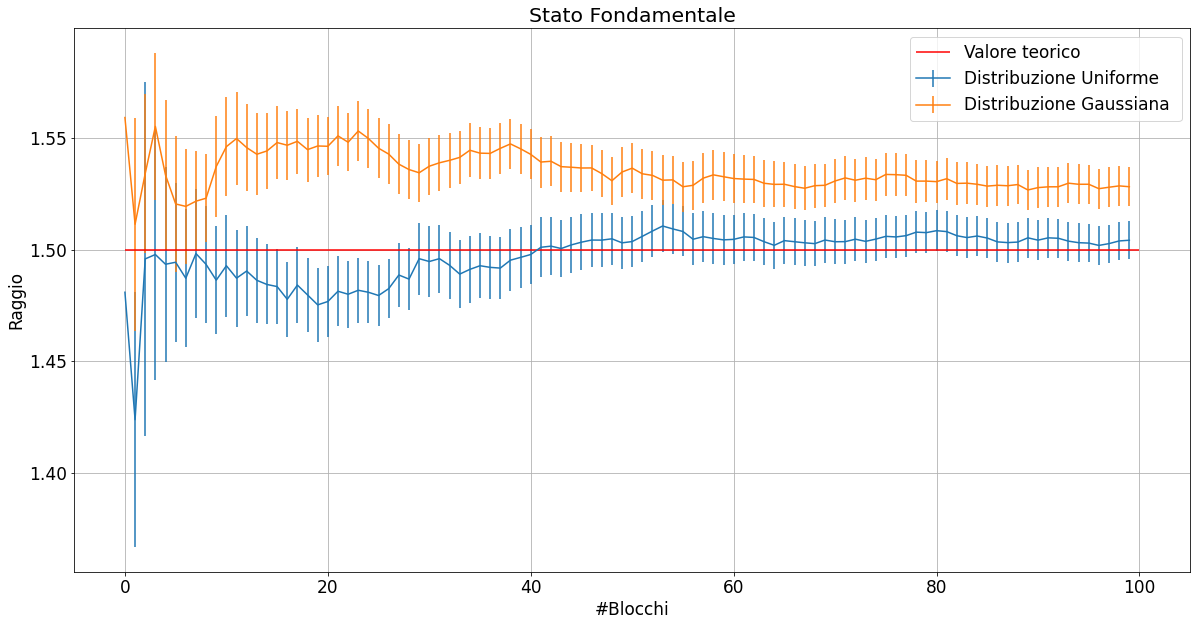

In [198]:
x = np.arange(100)
plt.figure(figsize=(20,10));
plt.errorbar(x,sum_prog[:,0],yerr=sum_prog[:,1],label="Distribuzione Uniforme")
plt.errorbar(x,sum_prog2[:,0],yerr=sum_prog2[:,1],label="Distribuzione Gaussiana ")
plt.hlines(1.5,0,len(x),color="red",label="Valore teorico")
plt.xlabel('#Blocchi')
plt.ylabel('Raggio')
plt.title("Stato Fondamentale")
plt.legend()
plt.grid(True)
plt.show()

Nel grafico mostro i risulati della stima del raggio dello stato fondamentale, utilizzando entrambe le distribuzioni. Si nota come in questo caso con una distribuzione uniforme otteniamo una stima migliore del raggio, rispetto a quella ottenuta utilizzando una gaussiana

### Raggio dello primo stato eccitato

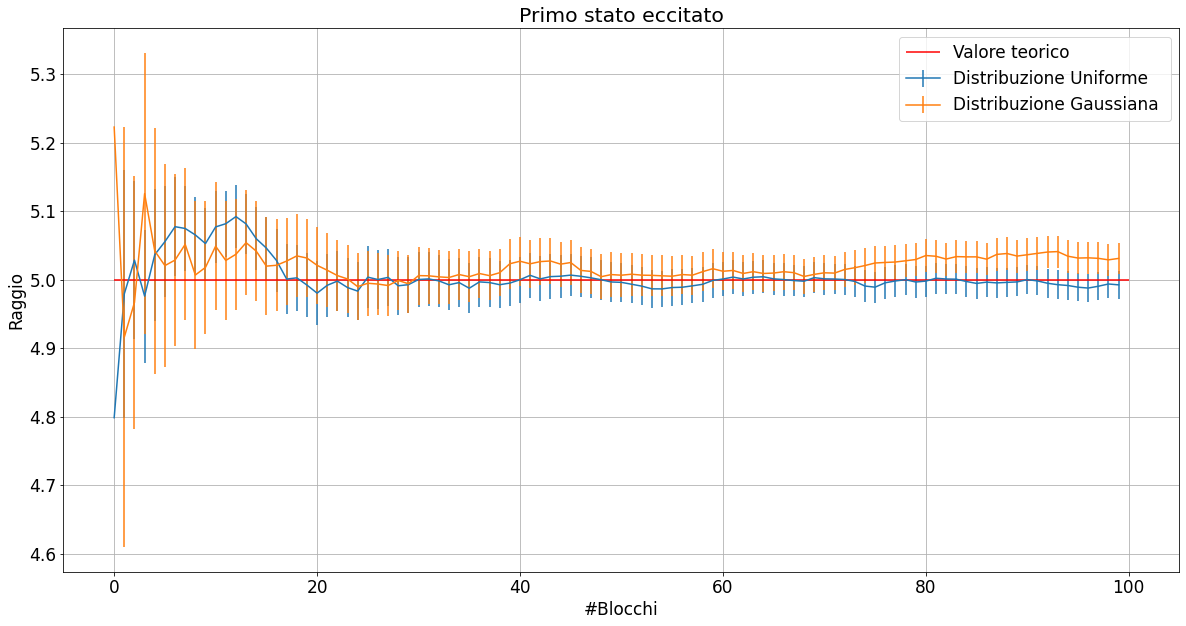

In [199]:
x = np.arange(100)
plt.figure(figsize=(20,10));
plt.errorbar(x,sum_prog3[:,0],yerr=sum_prog3[:,1],label="Distribuzione Uniforme")
plt.errorbar(x,sum_prog4[:,0],yerr=sum_prog4[:,1],label="Distribuzione Gaussiana ")
plt.hlines(5,0,len(x),color="red", label="Valore teorico")
plt.xlabel('#Blocchi')
plt.ylabel('Raggio')
plt.title("Primo stato eccitato")
plt.legend()
plt.grid(True)
plt.show()

Nel grafico mostro i risulati della stima del raggio del primo stato eccitato, utilizzando entrambe le distribuzioni. In questo caso ottengo una buona stima del raggio in entrambi i casi, ma la distribuzione uniforme si dimostra ancora leggermente migliore per la stima.